In [104]:
import numpy as np
from datetime import timedelta, datetime
import random
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
# Function to generate a random date within a range
def random_date(start, end):
    return start + timedelta(
        days=random.randint(0, int((end - start).days)))

# Define the start and end dates for the dataset period
start_date = datetime(2009, 1, 1)
end_date = datetime(2011, 12, 31)

In [106]:
# Sample values for categorical variables
customer_country_codes = ['USA', 'CAN', 'GBR', 'AUS', 'DEU']
product_codes = ['P001', 'P002', 'P003', 'P004', 'P005']
order_types = ['VO']
routes = ['Air', 'Sea', 'Road', 'Rail']
currencies = ['USD', 'CAD', 'GBP', 'AUD', 'EUR']

In [107]:
# Number of rows in the dataset
num_rows = 2421

# Generating the dataset
data = []
for _ in range(num_rows):
    order_date = random_date(start_date, end_date)
    delivery_date = order_date + timedelta(days=random.randint(15,180))
    country_code = random.choice(customer_country_codes)
    product_code = random.choice(product_codes)
    order_type = random.choice(order_types)
    route = random.choice(routes)
    currency = random.choice(currencies)
    value = round(random.uniform(100, 1000), 2)
    items = random.uniform(100, 1000)
    description = f"Parka - {product_code}"

    data.append([order_date, delivery_date, country_code, product_code, description,
                 order_type, f'CO-{random.randint(1000, 9999)}', value, currency, items, route])

# Creating DataFrame
df = pd.DataFrame(data, columns=['Order Date', 'Requested Delivery Date', 'Customer Country Code',
                                 'Product Code', 'Description', 'Order Type', 'Customer Order Code',
                                 'Value', 'Currency', 'Items', 'Route'])

print(df.head())  # Display the first few rows of the dataset

  Order Date Requested Delivery Date Customer Country Code Product Code  \
0 2011-06-18              2011-10-27                   GBR         P002   
1 2011-09-14              2011-11-08                   USA         P003   
2 2010-09-27              2010-11-02                   USA         P001   
3 2009-01-25              2009-06-27                   GBR         P003   
4 2009-11-14              2010-01-30                   GBR         P001   

    Description Order Type Customer Order Code   Value Currency       Items  \
0  Parka - P002         VO             CO-2159  653.40      CAD  719.957420   
1  Parka - P003         VO             CO-8554  314.79      USD  934.195010   
2  Parka - P001         VO             CO-3723  996.38      EUR  363.711113   
3  Parka - P003         VO             CO-1625  970.21      GBP  218.745700   
4  Parka - P001         VO             CO-9918  186.17      USD  498.414333   

  Route  
0  Rail  
1  Road  
2  Road  
3   Air  
4   Air  


In [108]:
# Convert 'Requested Delivery Date' and 'Order Date' to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d.%m.%Y')
df['Requested Delivery Date'] = pd.to_datetime(df['Requested Delivery Date'], format='%d.%m.%Y')

# Calculate the time difference in days
df['Time Difference'] = (df['Requested Delivery Date'] - df['Order Date']).dt.days

# Add 'Fast Demand' column
df['Fast Demand'] = np.where(df['Time Difference'] > 30, 1, 0)

# Drop the temporary 'Time Difference' column if not needed
df = df.drop('Time Difference', axis=1)


In [109]:
print(df.head())

  Order Date Requested Delivery Date Customer Country Code Product Code  \
0 2011-06-18              2011-10-27                   GBR         P002   
1 2011-09-14              2011-11-08                   USA         P003   
2 2010-09-27              2010-11-02                   USA         P001   
3 2009-01-25              2009-06-27                   GBR         P003   
4 2009-11-14              2010-01-30                   GBR         P001   

    Description Order Type Customer Order Code   Value Currency       Items  \
0  Parka - P002         VO             CO-2159  653.40      CAD  719.957420   
1  Parka - P003         VO             CO-8554  314.79      USD  934.195010   
2  Parka - P001         VO             CO-3723  996.38      EUR  363.711113   
3  Parka - P003         VO             CO-1625  970.21      GBP  218.745700   
4  Parka - P001         VO             CO-9918  186.17      USD  498.414333   

  Route  Fast Demand  
0  Rail            1  
1  Road            1  
2  Ro

In [110]:
# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d.%m.%Y')
df['Requested Delivery Date'] = pd.to_datetime(df['Requested Delivery Date'],    format='%d.%m.%Y')
# Extract month and create a 'Season' column
df['DELIVERY MONTH'] = df['Requested Delivery Date'].dt.month
df['SEASON'] = df['Requested Delivery Date'].dt.month.map({1: 'Winter', 2:   'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})


In [111]:
print(df.head())

  Order Date Requested Delivery Date Customer Country Code Product Code  \
0 2011-06-18              2011-10-27                   GBR         P002   
1 2011-09-14              2011-11-08                   USA         P003   
2 2010-09-27              2010-11-02                   USA         P001   
3 2009-01-25              2009-06-27                   GBR         P003   
4 2009-11-14              2010-01-30                   GBR         P001   

    Description Order Type Customer Order Code   Value Currency       Items  \
0  Parka - P002         VO             CO-2159  653.40      CAD  719.957420   
1  Parka - P003         VO             CO-8554  314.79      USD  934.195010   
2  Parka - P001         VO             CO-3723  996.38      EUR  363.711113   
3  Parka - P003         VO             CO-1625  970.21      GBP  218.745700   
4  Parka - P001         VO             CO-9918  186.17      USD  498.414333   

  Route  Fast Demand  DELIVERY MONTH  SEASON  
0  Rail            1       

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [113]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [114]:
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [133]:
data = df[['Order Date', 'Fast Demand','Items']]

In [134]:
data

,Order Date,Fast Demand,Items
0,2011-06-18,1,719.957420
1,2011-09-14,1,934.195010
2,2010-09-27,1,363.711113
3,2009-01-25,1,218.745700
4,2009-11-14,1,498.414333
...,...,...,...
2416,2010-08-29,1,446.196978
2417,2009-12-14,1,986.605308
2418,2010-04-22,1,202.003913
2419,2010-01-09,1,701.259401


In [135]:
import pandas as pd

# 假设你的 DataFrame 叫做 data
# 创建 "Aggregate Demand" 列，该列为 "Items" 列的累积和
data['Aggregate Demand'] = data['Items'].cumsum()

# 显示包含新列的数据框
print(data)


     Order Date  Fast Demand       Items  Aggregate Demand
0    2011-06-18            1  719.957420      7.199574e+02
1    2011-09-14            1  934.195010      1.654152e+03
2    2010-09-27            1  363.711113      2.017864e+03
3    2009-01-25            1  218.745700      2.236609e+03
4    2009-11-14            1  498.414333      2.735024e+03
...         ...          ...         ...               ...
2416 2010-08-29            1  446.196978      1.334506e+06
2417 2009-12-14            1  986.605308      1.335492e+06
2418 2010-04-22            1  202.003913      1.335694e+06
2419 2010-01-09            1  701.259401      1.336396e+06
2420 2009-12-06            1  921.774260      1.337317e+06

[2421 rows x 4 columns]


/var/folders/c2/7qpsnkf14s38y0d2tgt16cxm0000gn/T/ipykernel_1560/1346703764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Aggregate Demand'] = data['Items'].cumsum()


In [136]:
demand_counts = data['Fast Demand'].value_counts()

print(demand_counts)

Fast Demand
1    2203
0     218
Name: count, dtype: int64


<Axes: >

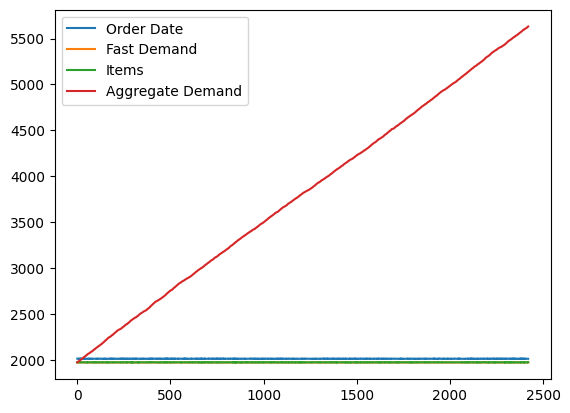

In [137]:
data.plot()
#categorical value, 这一步省略

In [138]:
# check for stationary

data.describe()

,Order Date,Fast Demand,Items,Aggregate Demand
count,2421,2421.000000,2421.000000,2.421000e+03
mean,2010-07-10 10:29:17.620817920,0.909955,552.382271,6.703720e+05
min,2009-01-01 00:00:00,0.000000,100.349584,7.199574e+02
25%,2009-10-04 00:00:00,1.000000,325.547353,3.413612e+05
50%,2010-07-23 00:00:00,1.000000,553.946220,6.734482e+05
75%,2011-04-10 00:00:00,1.000000,789.571751,9.963826e+05
max,2011-12-30 00:00:00,1.000000,998.943650,1.337317e+06
std,NaN,0.286306,262.848435,3.826243e+05


(array([[2421.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2421.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2421.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 232.,  241.,  238.,  248.,  243.,  254.,  250.,  235.,  239.,
          241.]]),
 array([      0.        ,  133731.74789796,  267463.49579593,
         401195.24369389,  534926.99159186,  668658.73948982,
         802390.48738778,  936122.23528575, 1069853.98318371,
        1203585.73108168, 1337317.47897964]),
 <a list of 4 BarContainer objects>)

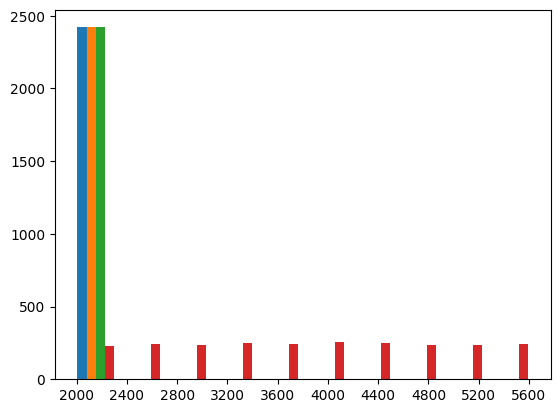

In [139]:
import matplotlib.pyplot as plt

# bimodal (with two peaks)
plt.hist(data)

/var/folders/c2/7qpsnkf14s38y0d2tgt16cxm0000gn/T/ipykernel_1560/3541043401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['7_dayMA'] = data['Fast Demand'].rolling(window=7).mean()


<Axes: >

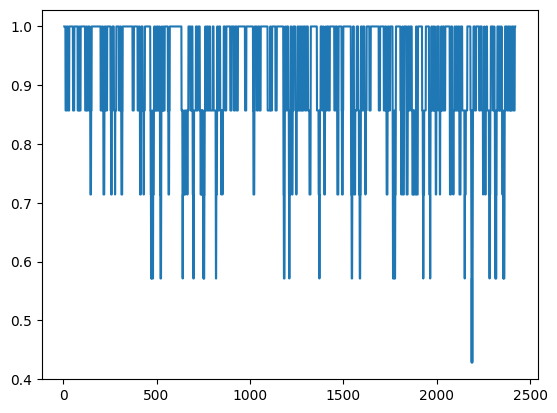

In [140]:
data['7_dayMA'] = data['Fast Demand'].rolling(window=7).mean()
data['7_dayMA'].plot()

In [141]:
data.head(20)

,Order Date,Fast Demand,Items,Aggregate Demand,7_dayMA
0,2011-06-18,1,719.957420,719.957420,NaN
1,2011-09-14,1,934.195010,1654.152430,NaN
2,2010-09-27,1,363.711113,2017.863543,NaN
3,2009-01-25,1,218.745700,2236.609242,NaN
4,2009-11-14,1,498.414333,2735.023575,NaN
5,2009-06-14,1,473.215475,3208.239050,NaN
6,2009-02-07,1,716.066527,3924.305577,1.000000
7,2010-12-11,1,299.071375,4223.376952,1.000000
8,2011-07-12,1,577.684872,4801.061824,1.000000
9,2009-08-17,1,514.281277,5315.343101,1.000000


/var/folders/c2/7qpsnkf14s38y0d2tgt16cxm0000gn/T/ipykernel_1560/1058128823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['30_dayMA'] = data['Fast Demand'].rolling(window=30).mean()


<Axes: >

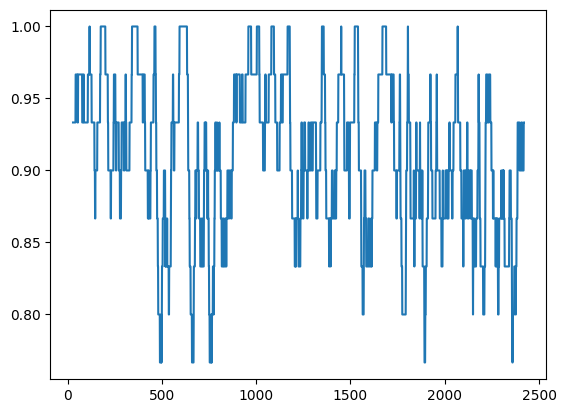

In [142]:
data['30_dayMA'] = data['Fast Demand'].rolling(window=30).mean()
data['30_dayMA'].plot()

In [143]:
data.reset_index(inplace=True)

In [144]:
data

,index,Order Date,Fast Demand,Items,Aggregate Demand,7_dayMA,30_dayMA
0,0,2011-06-18,1,719.957420,7.199574e+02,NaN,NaN
1,1,2011-09-14,1,934.195010,1.654152e+03,NaN,NaN
2,2,2010-09-27,1,363.711113,2.017864e+03,NaN,NaN
3,3,2009-01-25,1,218.745700,2.236609e+03,NaN,NaN
4,4,2009-11-14,1,498.414333,2.735024e+03,NaN,NaN
...,...,...,...,...,...,...,...
2416,2416,2010-08-29,1,446.196978,1.334506e+06,0.857143,0.900000
2417,2417,2009-12-14,1,986.605308,1.335492e+06,0.857143,0.900000
2418,2418,2010-04-22,1,202.003913,1.335694e+06,1.000000,0.900000
2419,2419,2010-01-09,1,701.259401,1.336396e+06,1.000000,0.933333


In [145]:
import pandas as pd

# Assuming 'data' is your DataFrame and the index is not a datetime object
# Convert the index to a datetime object
data.index = pd.to_datetime(data.index)

# Create the seasonal pivot table
seasonal_df = data.pivot_table(values='Fast Demand', aggfunc='mean', index=data.index.month, columns=data.index.year)


<Axes: >

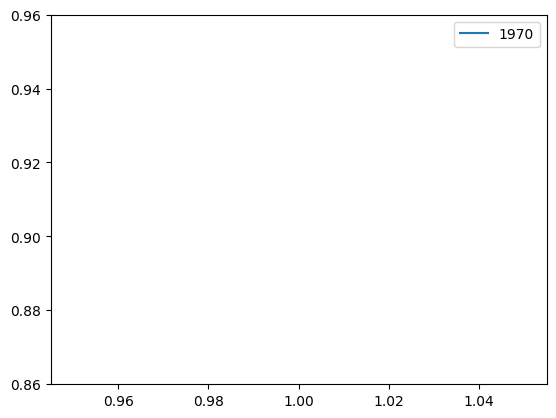

In [146]:
seasonal_df.plot()

<Axes: xlabel='y(t)', ylabel='y(t + 7)'>

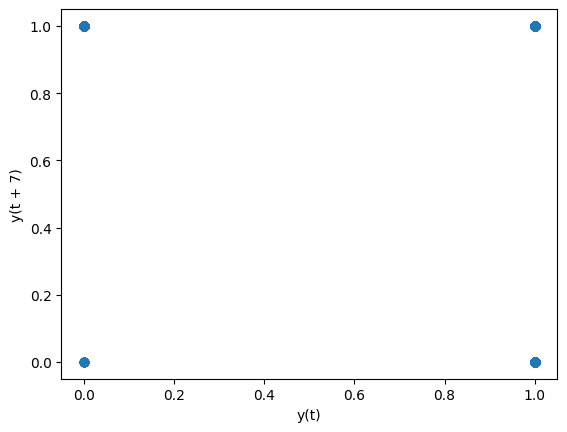

In [147]:
# autocorrelation plot

pd.plotting.lag_plot(data['Fast Demand'], lag=7)

/var/folders/c2/7qpsnkf14s38y0d2tgt16cxm0000gn/T/ipykernel_1560/2878792652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['7_day_lag'] = data['Fast Demand'].shift(7)


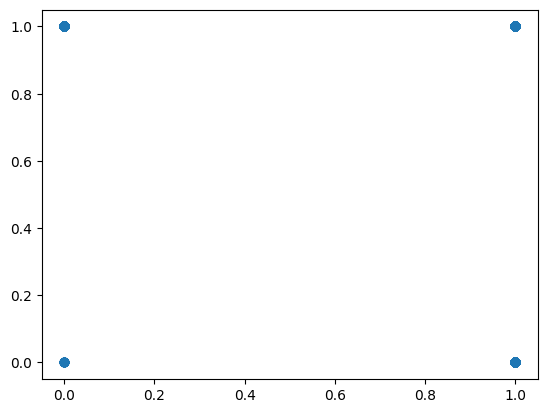

In [148]:
# same can be plot using plt
data['7_day_lag'] = data['Fast Demand'].shift(7)
plt.scatter(data['Fast Demand'], data['7_day_lag'])

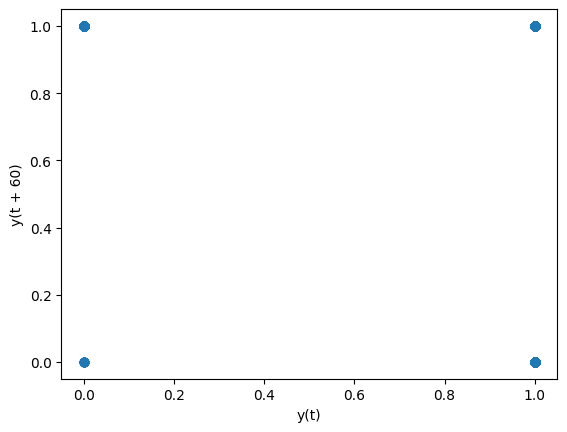

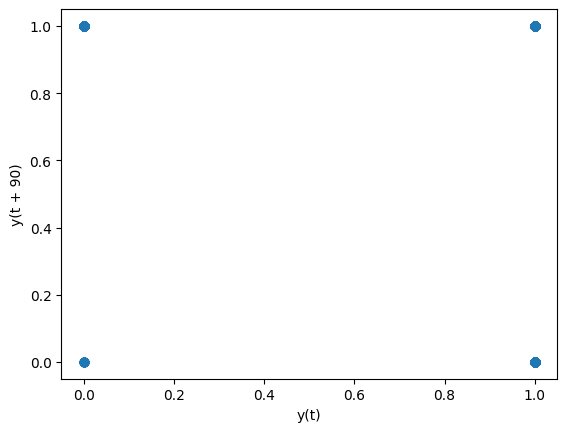

In [149]:
# 90 days is very week, no clear relationship, better relationship if the industry is stable, e.g. banks

pd.plotting.lag_plot(data['Fast Demand'], lag=60)
plt.show()
pd.plotting.lag_plot(data['Fast Demand'], lag=90)
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

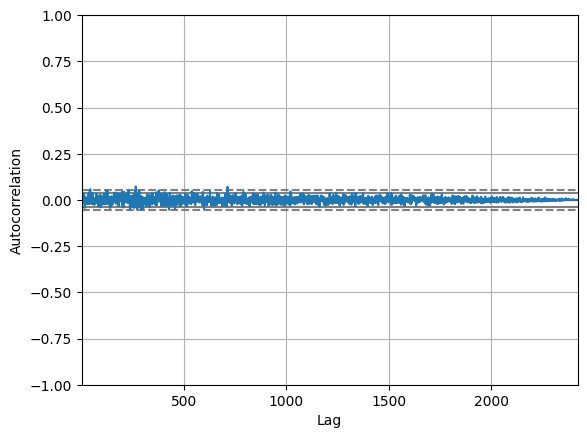

In [150]:
pd.plotting.autocorrelation_plot(data['Fast Demand'])

In [151]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [152]:
decomposed = seasonal_decompose(data['Fast Demand'], model = 'additive', period = 365)

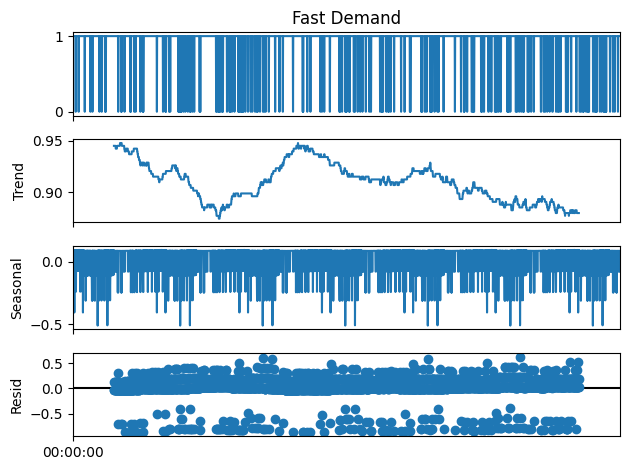

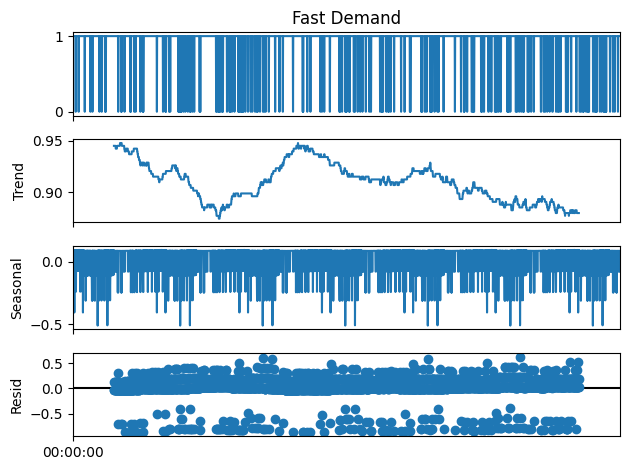

In [153]:
decomposed.plot()

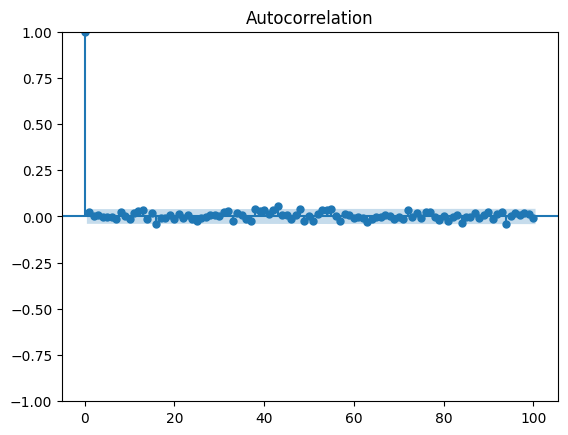

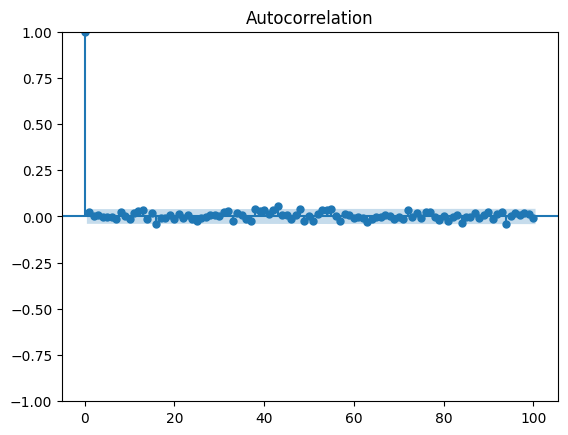

In [154]:
plot_acf(data['Fast Demand'], lags=100)

In [155]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [156]:
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

不考虑季节性：

In [161]:
import numpy as np
from pmdarima.arima import auto_arima

X = np.array(data['Fast Demand']).reshape(-1, 1)

arima_model = auto_arima(data['Aggregate Demand'], exogenous=X, start_p=1, start_q=1, max_p=5,
                         max_q=5, d=None, trace=True, test='adf',
                         error_action='ignore', suppress_warnings=True,
                         stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=33841.216, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33837.691, Time=1.56 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=33839.242, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33839.257, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=37923.954, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.529 seconds


In [ ]:
arima_model = auto_arima( df['Fast Demand'],start_p=1, start_q=1, max_p=5
                         , max_q=5
                         , d=None
                         ,trace=True
                         , test='adf'
                         , error_action='ignore'
                         , suppress_warnings=True
                         , stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1225.988, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1221.996, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1223.989, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1223.988, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6594.088, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.553 seconds


This code utilizes the `auto_arima` function to fit an ARIMA model. ARIMA (AutoRegressive Integrated Moving Average) is a time series analysis method used for forecasting future values of time series data.

Here's the explanation of the parameters in the code:

- `df['Fast Demand']`: This represents your time series data, presumably the 'Fast Demand' column.

- `start_p=1, start_q=1`: These are the initial values for the autoregressive (AR) and moving average (MA) orders in the ARIMA model.

- `max_p=5, max_q=5`: These set the maximum values for the autoregressive (AR) and moving average (MA) orders in the ARIMA model.

- `d=None`: The differencing order, the number of times the time series needs to be differenced to achieve stationarity.

- `trace=True`: It shows detailed output information during the model fitting.

- `test='adf'`: It performs an Augmented Dickey-Fuller (ADF) test for unit root to check for stationarity in the time series.

- `error_action='ignore'`: If there are errors in parameter specifications, it ignores them and doesn't interrupt the program.

- `suppress_warnings=True`: Suppresses warnings during the ARIMA fitting process.

- `stepwise=True`: Enables a stepwise search to find the best-fitting model.

The `auto_arima` function aims to simplify the modeling process by automatically selecting the best hyperparameters for the ARIMA model. The resulting `arima_model` will be the fitted ARIMA model.

ARIMA(p, d, q): The first set of parameters (p, d, q) represents the non-seasonal part of the ARIMA model:

p (Autoregressive Order): 0

d (Differencing Order): 0

q (Moving Average Order): 0

In this case, it indicates that there is no autoregressive (AR) component, no differencing, and no moving average (MA) component in the non-seasonal part of the model.

(P, D, Q)[s]: The second set of parameters (P, D, Q)[s] represents the seasonal part of the ARIMA model:

P (Seasonal Autoregressive Order): 0

D (Seasonal Differencing Order): 0

Q (Seasonal Moving Average Order): 0

s (Seasonal Periodicity): 0

Similar to the non-seasonal part, this indicates that there is no seasonal autoregressive (SAR), no seasonal differencing, and no seasonal moving average (SMA) component in the model.

In [ ]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2421
Model:                        SARIMAX   Log Likelihood                -608.998
Date:                Mon, 11 Dec 2023   AIC                           1221.996
Time:                        11:17:06   BIC                           1233.580
Sample:                             0   HQIC                          1226.209
                               - 2421                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8914      0.000   2443.334      0.000       0.891       0.892
sigma2         0.0968      0.001     65.671      0.000       0.094       0.100
Ljung-Box (L1) (Q):                   0.01   Jarque-

考虑季节性：

In [162]:
import numpy as np
from pmdarima.arima import auto_arima

X = np.array(data['Fast Demand']).reshape(-1, 1)

arima_model = auto_arima(data['Aggregate Demand'],exogenous=X
                         , start_p=1
                         , start_q=1
                         , max_p=3
                         , max_q=3
                         , m=12
                         , seasonal = True
                         , d=1
                         , start_P=0
                         , D=1
                         , trace=True
                         , test='adf'
                         , error_action='ignore'
                         , ssuppress_warnings=True
                         , stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.97 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=35335.658, Time=0.44 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=34627.429, Time=1.90 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.40 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=35336.930, Time=0.21 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=34356.123, Time=3.62 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=11.88 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.49 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=34355.417, Time=1.61 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=34627.348, Time=0.81 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=8.63 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.14 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=34356.147, Time=3.07 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=16.76 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=34

In [ ]:
arima_model = auto_arima(data['Fast Demand']
                         , start_p=1
                         , start_q=1
                         , max_p=3
                         , max_q=3
                         , m=12
                         , seasonal = True
                         , d=1
                         , start_P=0
                         , D=1
                         , trace=True
                         , test='adf'
                         , error_action='ignore'
                         , ssuppress_warnings=True
                         , stepwise=True)

Performing stepwise search to minimize aic


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=7.51 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4502.541, Time=0.36 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3188.658, Time=0.80 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3847.769, Time=0.32 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2910.521, Time=2.34 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.63 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.36 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3587.992, Time=2.16 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2639.850, Time=4.22 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2935.645, Time=2.41 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=19.14 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=9.05 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=2492.773, Time=6.97 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=2784.273, Time=3.07 sec
 ARIMA(3,1,0)(2,1,1)[12]

The notation "Best model: ARIMA(3,1,0)(2,1,0)[12]" represents the configuration of an ARIMA (AutoRegressive Integrated Moving Average) model with seasonal components. Let's break down each part of the notation:

- **ARIMA(p, d, q):**
  - **p (Autoregressive Order):** 3
  - **d (Differencing Order):** 1
  - **q (Moving Average Order):** 0

  This non-seasonal part indicates an autoregressive term of order 3 (AR(3)), one differencing operation to achieve stationarity, and no moving average component.

- **Seasonal part (P, D, Q)[s]:**
  - **P (Seasonal Autoregressive Order):** 2
  - **D (Seasonal Differencing Order):** 1
  - **Q (Seasonal Moving Average Order):** 0
  - **s (Seasonal Periodicity):** 12

  The seasonal part indicates a seasonal autoregressive term of order 2 (SAR(2)), one seasonal differencing operation, no seasonal moving average component, and a seasonal cycle of 12 (months).

In summary, this "Best model: ARIMA(3,1,0)(2,1,0)[12]" signifies a combination of non-seasonal and seasonal components in an ARIMA model. The non-seasonal part captures short-term dependencies, while the seasonal part captures repeating patterns with a yearly cycle. This model configuration is often chosen based on statistical criteria, such as minimizing information criteria like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion).

In [ ]:
print(arima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2391
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1240.386
Date:                            Mon, 11 Dec 2023   AIC                           2492.773
Time:                                    12:27:47   BIC                           2527.417
Sample:                                01-01-1970   HQIC                          2505.382
                                     - 01-01-1970                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7444      0.019    -39.400      0.000      -0.781      -0.707
ar.L2         -0.4930      0.021   

Based on the provided SARIMAX model results, here are some conclusions:

1. **Model Configuration:**
   - The SARIMAX(3, 1, 0)(2, 1, 0)[12] model includes three autoregressive terms in the non-seasonal part and two seasonal autoregressive terms with a seasonal periodicity of 12 months.
   - The model also involves one differencing operation for both non-seasonal and seasonal components.

2. **Fit Quality:**
   - The negative Log Likelihood value (-1240.386) suggests a reasonably good fit of the model to the data.
   - The AIC (2492.773) and BIC (2527.417) values, while not exceptionally low, indicate a model that balances goodness of fit with complexity.

3. **Coefficients:**
   - The negative coefficients for autoregressive terms indicate a negative correlation with past values, both non-seasonally and seasonally.

4. **Residual Analysis:**
   - The Ljung-Box statistic (Q) of 5.81 with a p-value of 0.02 suggests some residual autocorrelation at lag 1, indicating potential areas for improvement.
   - The Jarque-Bera statistic (654.75) with a p-value of 0.00 suggests that the residuals may not follow a normal distribution.

5. **Heteroskedasticity Test:**
   - The p-value for the heteroskedasticity test (0.16) indicates that there may not be significant evidence of heteroskedasticity in the residuals.

6. **Skewness and Kurtosis:**
   - The skewness value of -0.99 suggests a moderate negative skewness in the residuals.
   - The kurtosis value of 4.65 indicates a distribution with moderate tails.

In summary, the SARIMAX model shows a reasonable fit to the data, but there are indications of potential improvements, especially in addressing residual autocorrelation and non-normality. Further model refinement and diagnostic checks may be beneficial to enhance the model's performance.

In [ ]:
arima_model.predict(n_periods=180)

1970-01-01 00:00:00.000002421    1.0
1970-01-01 00:00:00.000002422    1.0
1970-01-01 00:00:00.000002423    1.0
1970-01-01 00:00:00.000002424    1.0
1970-01-01 00:00:00.000002425    1.0
                                ... 
1970-01-01 00:00:00.000002596    1.0
1970-01-01 00:00:00.000002597    1.0
1970-01-01 00:00:00.000002598    1.0
1970-01-01 00:00:00.000002599    1.0
1970-01-01 00:00:00.000002600    1.0
Freq: N, Length: 180, dtype: float64

In [ ]:
data['30_day_lag'] = data['Fast Demand'].shift(30)

/var/folders/c2/7qpsnkf14s38y0d2tgt16cxm0000gn/T/ipykernel_1560/2362294868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['30_day_lag'] = data['Fast Demand'].shift(30)


In [ ]:
data = data[['7_day_lag','30_day_lag','Fast Demand']].dropna()

In [ ]:
data

,7_day_lag,30_day_lag,Fast Demand
1970-01-01 00:00:00.000000030,1.0,1.0,1
1970-01-01 00:00:00.000000031,1.0,1.0,1
1970-01-01 00:00:00.000000032,1.0,1.0,1
1970-01-01 00:00:00.000000033,1.0,1.0,1
1970-01-01 00:00:00.000000034,1.0,1.0,1
...,...,...,...
1970-01-01 00:00:00.000002416,1.0,1.0,1
1970-01-01 00:00:00.000002417,1.0,1.0,1
1970-01-01 00:00:00.000002418,1.0,1.0,1
1970-01-01 00:00:00.000002419,0.0,1.0,1


In [ ]:
y = data['Fast Demand']
X = data[['7_day_lag','30_day_lag']]

In [ ]:
len(X)

2391

In [ ]:
x_train, x_test = X.iloc[:1500], X.iloc[1500:]
y_train, y_test = y.iloc[:1500], y.iloc[1500:]

In [ ]:
rf_model = RandomForestRegressor(n_estimators=50)
rf_model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=50)

In [ ]:
pred = rf_model.predict(x_test)

In [ ]:
import numpy as np
np.sqrt(mean_squared_error(pred, y_test))

0.32040689566458275